In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit

In [2]:
#Import the 800MB file from AWS s3 bucket
data = pd.read_csv('crime_temp_hardship_merged_df.csv')

C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data['Domestic'].unique()
data.dropna(how='any', inplace=True)


In [12]:
Timeseries_data = data[['date','COMMUNITY AREA NAME','Primary Type','Temp Avg (° F)','PER CAPITA INCOME ','HARDSHIP INDEX']].copy()
Timeseries_data

,date,COMMUNITY AREA NAME,Primary Type,Temp Avg (° F),PER CAPITA INCOME,HARDSHIP INDEX
0,2019-05-12,Greater Grand Crossing,WEAPONS VIOLATION,47.0,17285.0,66.0
1,2019-05-12,Greater Grand Crossing,WEAPONS VIOLATION,47.0,17285.0,66.0
2,2019-05-12,Greater Grand Crossing,BATTERY,47.0,17285.0,66.0
3,2019-05-12,Greater Grand Crossing,DECEPTIVE PRACTICE,47.0,17285.0,66.0
4,2019-05-12,Greater Grand Crossing,ASSAULT,47.0,17285.0,66.0
5,2019-05-12,Greater Grand Crossing,OTHER OFFENSE,47.0,17285.0,66.0
6,2019-05-12,Greater Grand Crossing,BATTERY,47.0,17285.0,66.0
7,2019-05-12,Greater Grand Crossing,OTHER OFFENSE,47.0,17285.0,66.0
8,2019-05-12,Greater Grand Crossing,CRIMINAL DAMAGE,47.0,17285.0,66.0
9,2019-05-12,Greater Grand Crossing,NARCOTICS,47.0,17285.0,66.0


In [13]:
Timeseries_data.head(2)

,date,COMMUNITY AREA NAME,Primary Type,Temp Avg (° F),PER CAPITA INCOME,HARDSHIP INDEX
0,2019-05-12,Greater Grand Crossing,WEAPONS VIOLATION,47.0,17285.0,66.0
1,2019-05-12,Greater Grand Crossing,WEAPONS VIOLATION,47.0,17285.0,66.0


In [34]:
#correct code
temp = Timeseries_data.groupby(["date", "COMMUNITY AREA NAME", "Primary Type"])
temp_agg = temp.agg({"Temp Avg (° F)": "mean", "HARDSHIP INDEX": "mean", "PER CAPITA INCOME ": "count"}).reset_index()
temp_agg = temp_agg.rename(columns={'PER CAPITA INCOME ': 'incidents'})
temp_agg = temp_agg.rename(columns={'Temp Avg (° F)': 'temp'})

In [35]:
#now we have a frame showing the count
del temp_agg['date']
del temp_agg['HARDSHIP INDEX']
temp_agg.head(2)


,COMMUNITY AREA NAME,Primary Type,temp,incidents
0,Albany Park,ASSAULT,11.0,2
1,Albany Park,BATTERY,11.0,3


In [41]:
#Lets create dummy variables for the community areas and primary type
#first lets copy the frame to not have to reload everything
data=temp_agg.copy()
X=pd.get_dummies(data[["COMMUNITY AREA NAME","Primary Type","temp"]])
y = data['incidents'].values.reshape(-1,1)



,temp,COMMUNITY AREA NAME_Albany Park,COMMUNITY AREA NAME_Archer Heights,COMMUNITY AREA NAME_Armour Square,COMMUNITY AREA NAME_Ashburn,COMMUNITY AREA NAME_Auburn Gresham,COMMUNITY AREA NAME_Austin,COMMUNITY AREA NAME_Avalon Park,COMMUNITY AREA NAME_Avondale,COMMUNITY AREA NAME_Belmont Cragin,...,Primary Type_OTHER NARCOTIC VIOLATION,Primary Type_OTHER OFFENSE,Primary Type_PROSTITUTION,Primary Type_PUBLIC INDECENCY,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION
0,11.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
###########SPLIT THE DATA##############3
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=42)

In [50]:
################3SCALE THE DATA
from sklearn.preprocessing import StandardScaler
X_scaler= StandardScaler().fit(X_train)
y_scaler= StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

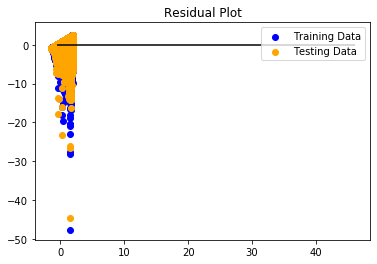

In [51]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [52]:
#Quantify the model
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7154393077140488, R2: 0.2898188589561558
